# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [176]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [177]:
url1= r'C:\Users\Eduardo Fonteneli\Desktop\Biblioteca\PROGRAMAÇÃO\Cientista de Dados - EBAC\Módulo 7\demo01.csv'

df1=pd.read_csv(url1)

In [178]:
df1

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,True
16646,F,N,Y,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,True
16647,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True
16648,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True


In [179]:
df1.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [180]:
df1['educacao']

0        Secondary / secondary special
1        Secondary / secondary special
2        Secondary / secondary special
3                     Higher education
4                    Incomplete higher
                     ...              
16645    Secondary / secondary special
16646    Secondary / secondary special
16647    Secondary / secondary special
16648    Secondary / secondary special
16649                 Higher education
Name: educacao, Length: 16650, dtype: object

In [181]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [182]:
df1.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [183]:
df1.sum()

sexo                     MFFMFFFFFFMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFF...
posse_de_veiculo         YNNYYYNNNNYNNNYYYYYYYYNNNNNNNNNNNNNNNNNNNNNNNN...
posse_de_imovel          YYYYNNYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYN...
qtd_filhos                                                            7212
tipo_renda               WorkingCommercial associateCommercial associat...
educacao                 Secondary / secondary specialSecondary / secon...
estado_civil             MarriedSingle / not marriedSingle / not marrie...
tipo_residencia          House / apartmentHouse / apartmentHouse / apar...
idade                                                        737919.887671
tempo_emprego                                              -2687583.830137
possui_celular                                                       16650
possui_fone_comercial                                                 3750
possui_fone                                                           4923
possui_email             

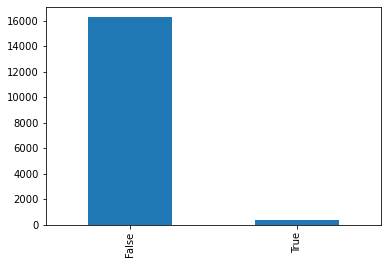

In [184]:
grafico_barras = df1['mau'].value_counts().plot.bar()

In [185]:
metadados.index

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'possui_celular', 'possui_fone_comercial',
       'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau'],
      dtype='object')

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [186]:
metadados = pd.DataFrame(df1.dtypes, columns = ['tipo']) #criar metadados através de um pd.DF utilizando o df1.dtypes(tipos dos dados), adicionar como coluna "tipo"
metadados['n_categorias']=0 #criar lista vazia com a coluna desejada n_catagorias
#fazer um laço como for pegando todo o index em metadados
for var in metadados.index:
    metadados.loc[var,'n_categorias']=len(df1.groupby([var]).size())
#parte dificil: adicionar os dados do index a suas respectivas categorias
#var em metadados==var em df1
metadados


,tipo,n_categorias
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,5298
tempo_emprego,float64,3005


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [168]:
df2=pd.get_dummies(df1)
df2

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_F,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,0,...,1,0,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,1,...,0,0,1,0,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,False,1,...,0,0,1,0,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,False,0,...,1,0,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,False,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,True,1,...,0,0,0,0,0,1,0,0,0,0
16646,0,43.389041,7.380822,1,1,1,0,2.0,True,1,...,1,0,0,0,0,1,0,0,0,0
16647,0,30.005479,9.800000,1,1,0,0,2.0,True,0,...,1,0,0,0,0,1,0,0,0,0
16648,0,30.005479,9.800000,1,1,0,0,2.0,True,0,...,1,0,0,0,0,1,0,0,0,0


In [169]:
df2.dtypes

qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
sexo_F                                      uint8
sexo_M                                      uint8
posse_de_veiculo_N                          uint8
posse_de_veiculo_Y                          uint8
posse_de_imovel_N                           uint8
posse_de_imovel_Y                           uint8
tipo_renda_Commercial associate             uint8
tipo_renda_Pensioner                        uint8
tipo_renda_State servant                    uint8
tipo_renda_Student                          uint8
tipo_renda_Working                          uint8


In [174]:
df2['mau'].unique()

array([False,  True])

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [116]:
df_email_veiculo=pd.crosstab(df1['possui_email'], df1['posse_de_veiculo'])
df_prev_mau=pd.crosstab(df1['posse_de_veiculo'], df1['mau'])
df_prev_mau2=pd.crosstab(df1['possui_email'], df1['mau'])

In [117]:
df_prev_mau

mau,False,True
posse_de_veiculo,,
N,9931,247
Y,6329,143


In [118]:
df_prev_mau2

mau,False,True
possui_email,,
0,14810,360
1,1450,30


In [119]:
df_email_veiculo

posse_de_veiculo,N,Y
possui_email,,
0,9341,5829
1,837,643


In [ ]:
A posse ou não de email se mostra mais valiosa do que a posse ou não de veículo, pois 92% dos maus pagadores não possuem email.

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [175]:
df2.to_csv("df_2.csv")